In [2]:
from sklearn.datasets import fetch_openml #download Minist
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


# 1. Logistic Model
---

In [3]:
def sigmoid(z):
    ''' 
    sigmoid(z) = exp(z)/1+exp(z)等价于 1/1+exp(-z) ->分子分母乘exp(-z)得到
    该方法采用第一个表达式（李航书里的）
    
    Args:
        z: sigmoid函数的输入参数
    Returns:
        sigmoid值
    '''
    sigmoid_z = np.exp(z)
    return sigmoid_z/(1+sigmoid_z)

def loss_function(y_true, y_pred):
    ''' 
    sigmoid的MLE Loss function
    李航书中的对数似然估计L(w)
    '''
    return np.mean((y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred)))
    

## 1.2 损失函数与参数估计
### 1.2.1 Loss function
> Logistic model的参数可以采用极大似然估计法定义Loss function。

具体步骤：

\begin{array}{l}
\text{1.设概率公式}\\
P(Y=1 \mid x)=\pi(x), \quad P(Y=0 \mid x)=1-\pi(x)\\
\text{2. 似然函数：}\\
\prod_{i=1}^{N}\left[\pi\left(x_{i}\right)\right]^{y_{i}}\left[1-\pi\left(x_{i}\right)\right]^{1-y_{i}}\\
\text{3. 取对数似然函数}\\
\begin{aligned}
L(w) & =\sum_{i=1}^{N}\left[y_{i} \log \pi\left(x_{i}\right)+\left(1-y_{i}\right) \log \left(1-\pi\left(x_{i}\right)\right)\right] \\
& =\sum_{i=1}^{N}\left[y_{i} \log \frac{\pi\left(x_{i}\right)}{1-\pi\left(x_{i}\right)}+\log \left(1-\pi\left(x_{i}\right)\right)\right] \\
& =\sum_{i=1}^{N}\left[y_{i}\left(w \cdot x_{i}\right)-\log \left(1+\exp \left(w \cdot x_{i}\right)\right]\right.
\end{aligned}
\end{array}
### 1.2.2 参数估计（Gradient Descend）
定义了Loss function后可以通过梯度下降法对其最优化求参数 $w$

In [16]:
def initialize_params(dims):
    ''' 
    初始化Logistic模型的参数W, b
    '''
    W = np.zeros((dims, 1))
    b = 0
    return W,b

def logistic(X, y, W, b):
    ''' 
    Logistic model的主体部分
    '''
    num_train, num_feature = X.shape    # 训练样本数量，特征数

    # 1. 前向传播
    z = np.dot(X,W) + b
    theta = sigmoid(z)
    # 2. 计算cross entropy（cost function）
    loss = -1/num_train * np.sum(y*np.log(theta) + (1-y)*np.log(1-theta))
    # 3. 计算W，b的梯度
    dW = np.dot(X.T, (theta-y))/num_train
    db = np.sum(theta - y)/num_train
    loss = np.squeeze(loss)
    return theta, loss, dW, db
    

def fit(X,y,lr=0.001,epochs=200, verbose=True):
    ''' 
    Logistic的参数训练过程,使用Gradient Descend算法
    
    Args:
        X: 训练数据集 ndarray
        y: 训练标签 ndarray
        lr: 学习率 默认为0.001
        epochs: 迭代次数
    Return:
        loss_list: 训练中的损失记录
        params: 模型参数
        grads: 参数梯度
    '''

    # 1. 初始化参数w，b为0，也可以使用其他初始化方法
    W, b = initialize_params(X.shape[1])

    loss_list = []   # 初始化损失列表

    # 2. 使用Gradient Descend算法迭代训练
    for i in range(epochs):
        # Forward Propagation: 得到预测值，loss和grad
        theta, loss, dW, db = logistic(X,y,W,b)

        # Update Params
        W -= lr*dW
        b -= lr*db
        
        if verbose and i % 100 == 0:
            loss_list.append(loss)
            print(f'Epoch {i} loss {loss}')
    params = {'W': W, 'b': b}
    grads = {'dW': dW, 'db': db}

    return loss_list, params, grads

def predict(X, params):
    ''' 
    根据训练得到的参数进行预测
    Args: 
        X: 输入数据
        params: 参数dict
    Return:
        y_pred: 转换后的预测值
    '''
    z = np.dot(X,params['W']) + params['b']
    y_pred = sigmoid(z)
    return np.array([1 if i > 0.5 else 0 for i in y_pred])


## 测试

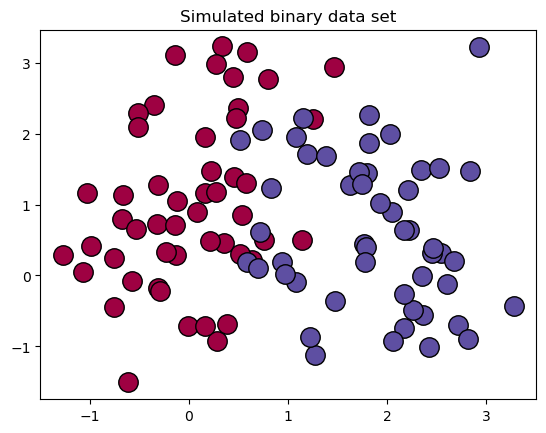

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
# 生成100*2的模拟二分类数据集
X, labels = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=2)

# 设置随机数种子
rng = np.random.RandomState(2)
# 对生成的特征数据添加一组均匀分布噪声
X += 2 * rng.uniform(size=X.shape)
# 标签类别数
unique_lables = set(labels)
# 根据标签类别数设置颜色
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_lables)))
# 绘制模拟数据的散点图
for k,col in zip(unique_lables, colors):
    x_k=X[labels==k]
    plt.plot(x_k[:,0],x_k[:,1],'o',markerfacecolor=col,markeredgecolor="k",
             markersize=14)
plt.title('Simulated binary data set')
plt.show()

In [6]:
X.shape, labels.shape

((100, 2), (100,))

In [7]:
# 对labels补维度
y = labels.reshape((-1,1))
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [17]:
# 训练
loss_ls, params, grads = fit(X_train, y_train, 0.01, 1000)

Epoch 0 loss 0.6931471805599454
Epoch 100 loss 0.5417172444255278
Epoch 200 loss 0.46527323507744944
Epoch 300 loss 0.4184090300525219
Epoch 400 loss 0.38634633872303775
Epoch 500 loss 0.3628273196995543
Epoch 600 loss 0.34470997236086665
Epoch 700 loss 0.33023810985247304
Epoch 800 loss 0.31835249233932883
Epoch 900 loss 0.3083756605596251


In [21]:
y_pred = predict(X_test, params)
print(f'Test acc: {accuracy_score(y_pred, y_test)}')
y_pred = predict(X_train, params)
print(accuracy_score(y_pred, y_train))

Test acc: 0.9
0.8888888888888888


In [23]:
params

{'W': array([[ 1.55792674],
        [-0.56933042]]),
 'b': -0.5218150195840855}

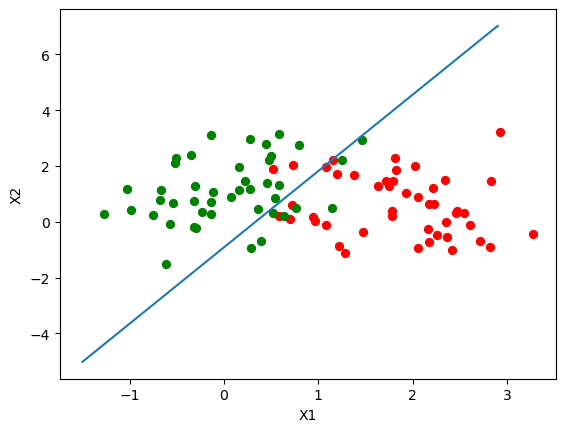

In [32]:
# 绘制boundary
def plot_decision_boundary(X_train, y_train, params):
    x0, y0, x1, y1 = [], [], [], []
    for i in range(X_train.shape[0]):
        if y_train[i] == 1:
            x1.append(X_train[i][0])
            y1.append(X_train[i][1])
        else:
            x0.append(X_train[i][0])
            y0.append(X_train[i][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x1,y1, s = 32, c='red')
    ax.scatter(x0,y0, s = 32, c='green')
    x = np.arange(-1.5, 3, 0.1)
    y = (-params['b'] - params['W'][0]*x) / params['W'][1]
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
plot_decision_boundary(X_train,y_train,params)

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

/Users/xingwencui/miniconda3/envs/fit5221/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9

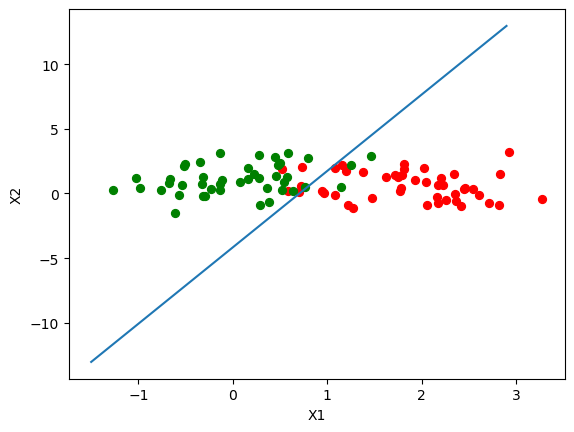

In [40]:
params = {'W': clf.coef_[0], 'b': clf.intercept_}
plot_decision_boundary(X_train, y_train, params)